In [55]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-22 00:40:17--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [    <=>             ] 999.85K  1.02MB/s    in 1.0s    

2024-10-22 00:40:20 (1.02 MB/s) - ‘bank+marketing.zip’ saved [1023843]



Unzip all folder

In [56]:
import zipfile
with zipfile.ZipFile('/workspaces/ml-zoomcamp/04-evaluation/bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('/workspaces/ml-zoomcamp/04-evaluation')

Unzip the bank folder only

In [57]:
import zipfile
with zipfile.ZipFile('/workspaces/ml-zoomcamp/04-evaluation/bank.zip', 'r') as zip_ref:
    zip_ref.extractall('/workspaces/ml-zoomcamp/04-evaluation')

keep the wanted files and remove the rest

In [58]:
import os

directory = "/workspaces/ml-zoomcamp/04-evaluation/"

keep_files = ["bank-full.csv", "homework.ipynb"]

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    
    # Check if the file is not in the keep_files list and remove it
    if filename not in keep_files:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Removed: {file_path}")
        else:
            print(f"Skipped: {file_path} (not a file)")


Removed: /workspaces/ml-zoomcamp/04-evaluation/bank-names.txt
Removed: /workspaces/ml-zoomcamp/04-evaluation/bank.csv
Removed: /workspaces/ml-zoomcamp/04-evaluation/bank+marketing.zip
Removed: /workspaces/ml-zoomcamp/04-evaluation/bank.zip
Removed: /workspaces/ml-zoomcamp/04-evaluation/bank-additional.zip


In [59]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv('/workspaces/ml-zoomcamp/04-evaluation/bank-full.csv', sep=';', quotechar='"') # edit the separator and quotechar to match file format

In [61]:
features = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]

In [62]:
data = df[features]

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [64]:
data.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [65]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [66]:
data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [67]:
SEED = 42

In [68]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

In [69]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [70]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [71]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

**Question 1: ROC AUC feature importance**

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
- Use the training dataset for that

Which numerical variable (among the following 4) has the highest AUC?




In [72]:
data_numeric = data.copy()
data_numeric = data.drop(
    ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y'], axis=1
)

In [73]:
data.y = (data.y == 'yes').astype(int)
data

/tmp/ipykernel_3685/2313097522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.y = (data.y == 'yes').astype(int)


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [74]:
numerical_features = ['balance', 'day', 'duration', 'previous']

In [75]:
from sklearn.metrics import roc_auc_score

auc_scores = {}

for feature in numerical_features:
    score = roc_auc_score(y_train, df_train[feature])
    auc_scores[feature] = score
    # Invert variable if AUC < 0.5
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[feature])
        auc_scores[feature] = score

# Display AUC scores
print("AUC Scores:")
for feature, score in auc_scores.items():
    print(f"{feature}: {score:.4f}")

max_auc_feature = max(auc_scores, key=auc_scores.get)
max_auc_value = auc_scores[max_auc_feature]

print(f"The numerical variable with the highest AUC is '{max_auc_feature}' with an AUC of {max_auc_value:.4f}.")


AUC Scores:
balance: 0.5868
day: 0.5250
duration: 0.8066
previous: 0.6034
The numerical variable with the highest AUC is 'duration' with an AUC of 0.8066.


**Question 2: Training the model**

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:



In [76]:
y_train = df_train['y'].apply(lambda x: 1 if x == 'yes' else 0).values
y_val = df_val['y'].apply(lambda x: 1 if x == 'yes' else 0).values

X_train = df_train.drop(columns=['y'])
X_val = df_val.drop(columns=['y'])

X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(X_train_dict)
X_val_encoded = dv.transform(X_val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

y_val_pred_proba = model.predict_proba(X_val_encoded)[:, 1]  # Probability of positive class
auc_score = roc_auc_score(y_val, y_val_pred_proba)

# Round the AUC score to three decimal places
print(f"AUC on validation dataset: {auc_score:.3f}")


AUC on validation dataset: 0.911


**Question 3: Precision and Recall**

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?



In [77]:
from sklearn.metrics import precision_score, recall_score

y_val_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

thresholds = np.arange(0.0, 1.01, 0.01)
precisions = []
recalls = []

In [78]:
# Compute precision and recall for each threshold
for threshold in thresholds:
    y_val_pred = (y_val_pred_proba >= threshold).astype(int)  
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precisions.append(precision)
    recalls.append(recall)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


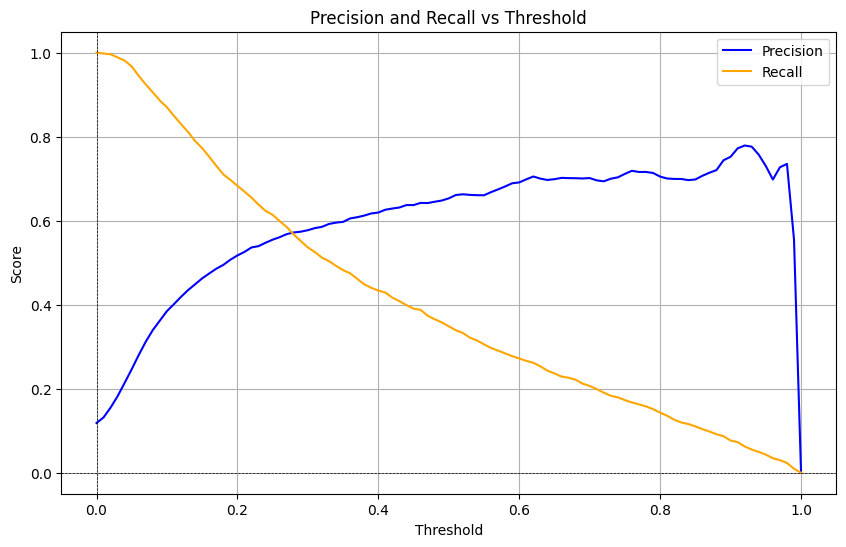

In [79]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

In [80]:
first_intersection_index = None

for i in range(1, len(precisions)):
    if (precisions[i-1] >= recalls[i-1] and precisions[i] < recalls[i]) or \
       (precisions[i-1] <= recalls[i-1] and precisions[i] > recalls[i]):
        first_intersection_index = i
        break

# Get the threshold of the first intersection if found
if first_intersection_index is not None:
    first_intersection_threshold = thresholds[first_intersection_index]
    print(f"The precision and recall curves first intersect at a threshold of {first_intersection_threshold:.3f}.")
else:
    print("No intersection point found.")


The precision and recall curves first intersect at a threshold of 0.280.


**Question 4: F1 score**

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?



In [81]:
# Initialize F1 scores list
f1_scores = []

# Compute F1 scores for each threshold
for precision, recall in zip(precisions, recalls):
    if precision + recall > 0:  # To avoid division by zero
        f1 = (2 * precision * recall) / (precision + recall)
    else:
        f1 = 0.0
    f1_scores.append(f1)

In [82]:
# Finding the threshold where F1 is maximal
max_f1_index = np.argmax(f1_scores)  # Get the index of the maximum F1 score
max_f1_threshold = thresholds[max_f1_index]
max_f1_value = f1_scores[max_f1_index]

print(f"The maximum F1 score of {max_f1_value:.3f} occurs at a threshold of {max_f1_threshold:.3f}.")

The maximum F1 score of 0.590 occurs at a threshold of 0.220.


**Question 5: 5-Fold CV**

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
- Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?



In [83]:
from sklearn.model_selection import KFold

y = df_full_train['y'].apply(lambda x: 1 if x == 'yes' else 0).values
X = df_full_train.drop(columns=['y'])  

# One-Hot Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

for train_index, val_index in kf.split(X_encoded):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred_proba)
    auc_scores.append(auc)

# Calculate the standard deviation of the AUC scores
std_dev_auc = np.std(auc_scores)

# Output the results
print(f"AUC scores across folds: {auc_scores}")
print(f"Standard deviation of AUC scores: {std_dev_auc:.3f}")


AUC scores across folds: [np.float64(0.9083667286877131), np.float64(0.9033238561266913), np.float64(0.9056690624242913), np.float64(0.8923878791867899), np.float64(0.9153062501903173)]
Standard deviation of AUC scores: 0.007


**Question 6: Hyperparameter Tuning**

Now let's use 5-Fold cross-validation to find the best parameter `C`

- Iterate over the following `C` values: `[0.000001, 0.001, 1]`
- Initialize `KFold` with the same parameters as previously
- Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?



In [85]:
C_values = [0.000001, 0.001, 1]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

results = {}

# Iterate over the C values
for C in C_values:
    auc_scores = []
    
    for train_index, val_index in kf.split(X_encoded):
        X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred_proba)
        auc_scores.append(auc)
    
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # Store results
    results[C] = (round(mean_auc, 3), round(std_auc, 3))

best_C = max(results, key=lambda x: results[x][0])
best_mean_auc, best_std_auc = results[best_C]

# Output the results
print("Results for different C values:")
for C, (mean_auc, std_auc) in results.items():
    print(f"C: {C}, Mean AUC: {mean_auc}, Std AUC: {std_auc}")

print(f"Best C: {best_C} with Mean AUC: {best_mean_auc} and Std AUC: {best_std_auc}")

Results for different C values:
C: 1e-06, Mean AUC: 0.695, Std AUC: 0.009
C: 0.001, Mean AUC: 0.86, Std AUC: 0.006
C: 1, Mean AUC: 0.905, Std AUC: 0.007
Best C: 1 with Mean AUC: 0.905 and Std AUC: 0.007
